#IS 470 QUIZ 1

---

## BartRider Classification
<br>
You have been given a data file by the San Francisco Bay Area Rapid Transit (BART), which identifies a set of demographics for residents in a local area. We will use this file to determine if a resident is a rider.
<br><br>
VARIABLE DESCRIPTIONS:<br>
<br>
Age:  

            1.   14 thru 17
            2.   18 thru 24
            3.   25 thru 34
            4.   35 thru 44
            5.   45 thru 54
            6.   55 thru 64
            7.   65 and Over

DistToWork: Distance to work in miles<br>
DualInc: Is dual income household or not<br>
Education:  
            
            1. Grade 8 or less<br>
            2. Grades 9 to 11<br>
            3. Graduated high school<br>
            4. 1 to 3 years of college<br>
            5. College graduate<br>
            6. Grad Study<br>
Gender:	M or F<br>
Income: 
        
            1. Less than $10,000<br>
            2. $10,000 to $14,999<br>
            3. $15,000 to $19,999<br>
            4. $20,000 to $24,999<br>
            5. $25,000 to $29,999<br>
            6. $30,000 to $39,999<br>
            7. $40,000 to $49,999<br>
            8. $50,000 to $74,999<br>
            9. $75,000 or more<br>
Language:	Language spoken at home<br>
NbrInHouseHold:	Number in household<br>
NbrInHouseholdUnder18:	Number in household under 18 years old<br>
OwnRent:	Own, rent, or live with parents<br>
YrsInArea:	Years lived in bay area<br>
Rider:	No, Non-rider; Yes, Rider<br>
<br>
**Target variable: Rider**

## 1.Upload and clean data

In [2]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BartRider.csv to BartRider.csv
User uploaded file "BartRider.csv" with length 199121 bytes


In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [4]:
# Read data
BartRider = pd.read_csv('BartRider.csv')
BartRider

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,7,14,N,3,F,3,English,1,0,Rent,5,Yes
1,7,10,N,5,M,8,English,2,0,Own,5,No
2,3,9,N,3,M,1,English,1,0,Rent,5,Yes
3,1,13,N,2,M,1,English,5,3,Parent,5,Yes
4,3,14,N,5,F,2,English,3,1,Parent,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,Y,4,M,5,English,2,0,Own,5,Yes
5489,4,9,Y,3,F,6,English,3,1,Rent,2,Yes
5490,2,7,N,4,M,2,English,1,1,Rent,1,Yes
5491,3,7,Y,3,F,9,English,2,0,Own,5,No


In [5]:
# Examine the number of rows and cols
BartRider.shape

(5493, 12)

In [6]:
# Change categorical variables to "category"
BartRider['DualInc'] = BartRider['DualInc'].astype('category')
BartRider['Gender'] = BartRider['Gender'].astype('category')
BartRider['Language'] = BartRider['Language'].astype('category')
BartRider['OwnRent'] = BartRider['OwnRent'].astype('category')
BartRider['Rider'] = BartRider['Rider'].astype('category')

In [7]:
# Examine variable type
BartRider.dtypes

Age                         int64
DistToWork                  int64
DualInc                  category
Education                   int64
Gender                   category
Income                      int64
Language                 category
NbrInHouseHold              int64
NbrInHouseholdUnder18       int64
OwnRent                  category
YrsInArea                   int64
Rider                    category
dtype: object

## 2.Data partitioning and inspection code

In [8]:
# Select categorical variables
BartRider_category = BartRider.select_dtypes(include=['category'])
BartRider_category

,DualInc,Gender,Language,OwnRent,Rider
0,N,F,English,Rent,Yes
1,N,M,English,Own,No
2,N,M,English,Rent,Yes
3,N,M,English,Parent,Yes
4,N,F,English,Parent,Yes
...,...,...,...,...,...
5488,Y,M,English,Own,Yes
5489,Y,F,English,Rent,Yes
5490,N,M,English,Rent,Yes
5491,Y,F,English,Own,No


In [9]:
# Create dummy variables for DualInc, Gender, Language, and OwnRent
BartRider = pd.get_dummies(BartRider_category, columns=['DualInc','Gender','Language','OwnRent'], drop_first=True)
BartRider

,Rider,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent
0,Yes,0,0,0,0,0,1
1,No,0,1,0,0,0,0
2,Yes,0,1,0,0,0,1
3,Yes,0,1,0,0,1,0
4,Yes,0,0,0,0,1,0
...,...,...,...,...,...,...,...
5488,Yes,1,1,0,0,0,0
5489,Yes,1,0,0,0,0,1
5490,Yes,0,1,0,0,0,1
5491,No,1,0,0,0,0,0


In [12]:
# Partition the data to predictors_train, predictors_test, target_train, and target_test. Set test_size=0.3 and random_state=0. (3 points)
target = BartRider['Rider']
predictors = BartRider.drop(['Rider'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(3845, 6) (1648, 6) (3845,) (1648,)


## 3.Naive Bayes training and testing.

In [13]:
# Build a Naive Bayes model on training data with default setting (2 points)
model = MultinomialNB()
model.fit(predictors_train, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
# Make predictions on testing data (1 point)
prediction_on_test = model.predict(predictors_test)
prediction_on_test

array(['Yes', 'Yes', 'Yes', ..., 'No', 'Yes', 'No'], dtype='<U3')

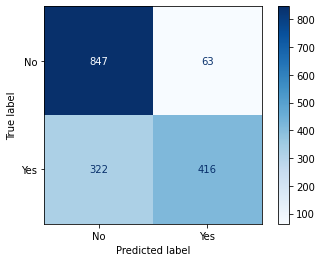

In [15]:
# Examine the evaluation results on testing data: confusion_matrix (1 point)
plot_confusion_matrix(model, predictors_test, target_test, cmap= plt.cm.Blues, values_format='d')

In [16]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.72      0.93      0.81       910
         Yes       0.87      0.56      0.68       738

    accuracy                           0.77      1648
   macro avg       0.80      0.75      0.75      1648
weighted avg       0.79      0.77      0.76      1648



***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the IS470_02_quiz1.ipynb file***
2.   ***Upload the IS470_02_quiz1.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [17]:
!jupyter nbconvert --to html IS470_02_quiz1.ipynb

[NbConvertApp] Converting notebook IS470_02_quiz1.ipynb to html
[NbConvertApp] Writing 314249 bytes to IS470_02_quiz1.html
